# IMAGE COMPRESSION WITH WAVLETS

---------------------

Artash Nath

UTAT Pay-Elec Team

---------------------

In [1]:
import numpy as np
import mahotas
import cv2
from mahotas.thresholding import soft_threshold
from matplotlib import pyplot as plt
from skimage.io import imread

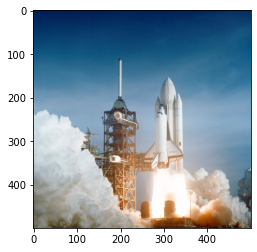

In [2]:
im = cv2.resize(imread('rocket.jpg')[:1000, :1000], (500,500) )# Read Sample Image

plt.imshow(im)

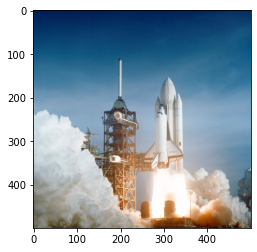

In [3]:
a,b,c = im[:,:,0], im[:,:,1], im[:,:,2]

plt.imshow(np.stack([a,b,c], axis = -1))

In [4]:
wavlet = mahotas.daubechies(a,'D8')

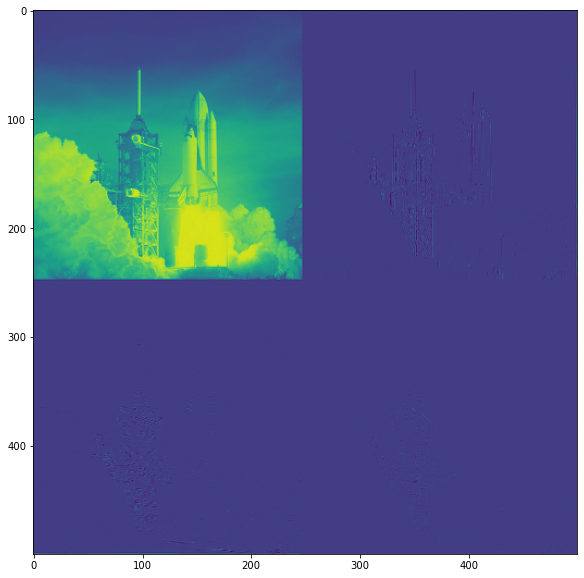

In [5]:
plt.figure(figsize = (10,10))
plt.imshow(wavlet)

In [22]:
thresh = 0.99

keep_threshold = np.sort(abs((wavlet.ravel())))[int(wavlet.size*(1-thresh))] # Determines lowest DCT Coeff values to keep based on "thresh"

wavlet = wavlet * (abs(wavlet) > (keep_threshold)) # Removes all DCT Vales lower then determines threshold from DCT Coeff. Array
P = round((np.sum(abs(wavlet) > (keep_threshold))/wavlet.size)*100, 2) # Re-Calculates threshold of pixels discarded for verification

r_im = mahotas.idaubechies(wavlet, 'D8')

In [6]:
r_im = mahotas.idaubechies(wavlet, 'D8')

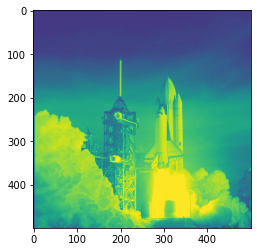

In [7]:
plt.imshow(r_im)

In [17]:
P

10.0